In [ ]:

'''
- 정량 평가의 경우 (e.g. acc 80% 이상)은 정확히 해당 지표를 맞추어야 합니다.
- 다음의 경우는 **미평가**가 될 수 있습니다.
    - **코드만 있고 결과물이 없는 경우**
        - **코드에 대한 설명이 없는 경우**
        - **회고가 없는 경우**
    - **깃헙 링크가 잘못되어 열람이 안되는 경우**
        - **(중요) 링크를 제출하기 전에 해당 링크에서 프로젝트가 잘 열리는지 꼭 확인해주세요.**
        - 만약 프로젝트의 용량이 커서 프로젝트 로딩이 안된다면 **nbviewer 링크**를 제출해주세요.
'''

In [6]:
# sklearn라이브러리를 임포트하고 버전 확인하기
import sklearn

print(sklearn.__version__)

1.0


In [7]:
# 1. import 하기
from sklearn.datasets import load_digits                # sklearn datasets으로 digits 데이터셋 로드
from sklearn.model_selection import train_test_split    # 데이터셋을 train, test로 분할

from sklearn.metrics import classification_report       # Text summary of the precision, recall, F1 score for each class
from sklearn.metrics import accuracy_score              # sklearn.metrincs는 평가에 대한 함수 모음집, 정확도
from sklearn.metrics import confusion_matrix            # sklearn.metrincs는 평가에 대한 함수 모음집, 오차행렬

from sklearn.tree import DecisionTreeClassifier         # DecisionTree 분류기
from sklearn.ensemble import RandomForestClassifier     # Random forest 분류기
from sklearn import svm                                 # SVM 분류기
from sklearn.linear_model import SGDClassifier          # SGD 분류기
from sklearn.linear_model import LogisticRegression     # Logistic Regression 분류기

import matplotlib.pyplot as plt                         # matplotlib


# 이미지르 현재 화면에 보여주기 위한 코드
%matplotlib inline 


# 2. 데이터 준비하기
digits = load_digits()          # digits 데이터셋의 객체 생성(자료 가져오기)


# 3. 데이터 이해하기
digits_data = digits.data       # digits 데이터셋의 feature값들을 data 변수에 할당
digits_label = digits.target    # digits 데이터셋의 target 값들을 label 변수에 할당

dir(digits)                     # digits 메서드 보기
type(digits)                    # type은 Bunch으로 Dictionary 자료형과 유사한 자료형
digits.keys()                   # digits 메서드 보기
                                
digits_data                     # data는 머신러닝에 학습시킬 "문제지"
digits_data.shape               # nd.ndarray 타입이고, 1797개 데이터(세로)가 있으며 64개의 속성값(가로)이 있음
                                
digits_data[0]                  # digits.data의 첫번째 데이터(원소) 확인
digits_data[0].shape            # 첫번째 데이터는 64개 픽셀이 있음
digits.feature_names            # 속성(Attribute)의 이름
                                # 'pixel_0_0 처럼 0번 데이터의 0번 속성'
digits.frame                    # ???? NoneType이며
digits.images.shape             # 이미지 파일이 1797개 있으며, 하나의 파일은 8x8픽셀이어서 64개의 배열칸을 사용함
digits.images                   # type은 numpy.ndarray이고, 1797개 데이터가 존재하면 각 데이터는 64개 픽셀
digits.target.shape             # target 속성은 1797개 데이터가 존재
digits.target                   # digits 데이터셋의 속성값 보기. type은 ndarray(1차원)
                                # target은 머신러닝 학습에 필요한 "정답지"
digits.target_names             # label 이름(class 이름)
                                # 즉 각 클래스 이름
target_names = digits.target_names  # 타켓 이름을 변수에 저장
print(digits.DESCR)             # digits 데이터셋 설명


# 4. Train, Test로 데이터 분할하기
''' 전체 데이터를 모두 학습시키는데 사용하면 테스트용 데이터가 없으므로 데이터의 일부는 테스트용으로 떼어놓는다
    digits_data 데이터셋을 X_train, X_test(20%) 떼어두고, digits_label 데이터셋을 y_train, y_test(20%) 떼어 놓는다
    
    테스트 사이즈 0.2라는 의미는 20%를 떼어 놓겠다는 의미
    
    random_state는 데이터 분할하기 전에 임의로 돌려서 분할한다는 의미이며 숫자는 램덤 시드값.
    train_test_split 인자중 shuffle=True이므로 랜덤 씨드값만 부여하면 됨
    사용 이유는 digits.target의 값은 0으로 채우다가 1채우고 2채우는 형식이기 때문에
    먄약 랜덤으로 썩지 않고 데이터를 분할하면 앞에서부터 대부분 0과 1의 라벨값만 얻어지고 테스트는 전부 2로 할당받을 것이므로 
    데이터 결과의 정확성을 위해 임의로 썩는다
    '''
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=7)  

X_train.shape, y_train.shape    # train 데이터는 전체 데이터의 80% 차지
X_test.shape, y_test.shape      # test 데이터는 전체 데이터의 20% 차지

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

((360, 64), (360,))

In [24]:
target_names                                       # 타켓 네임 출력해보기. 악성과 양성

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

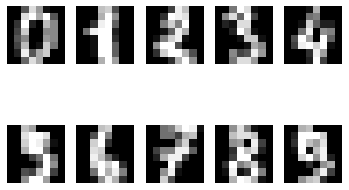

In [9]:
# 한 번 그려보기
# 데이터 10개를 추출해서 1열인 배열을 8x8로 재형상시킨후 matplotlib.pyplot으로 이미지를 나타냄
for i in range(10):
    
    # subplot의 axis를 2x5 행렬로 설정하고 순회할 때마다 오른쪽으로 한 칸씩 할당
    plt.subplot(2, 5, 1+i)  
    
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    plt.imshow(digits_data[i].reshape(8, 8), cmap='gray')  # 색상은 gray(흑백)
    
    plt.axis('off')  # 축을 보이지 않게 설정
plt.show()

In [ ]:
# 5. 모델 학습

In [10]:
# 5-1. DecisionTree 모델 학습
decision_tree = DecisionTreeClassifier(random_state=32)     # DecisionTreeClassifier 객체 생성, 랜덤 씨드는 32
print(decision_tree._estimator_type)                        # decision_tree 객체 타입은 classifier인 분류기

decision_tree.fit(X_train, y_train)                         # train 데이터셋으로 의사결정나무 모델 지도학습(fitting)

y_pred_decision_tree = decision_tree.predict(X_test)        # 학습된 모델에 테스트 feature데이터 넣어서 예측값 생성
y_pred_decision_tree

classifier


array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 3, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 5, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 2, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 2, 7,
       7, 2, 2, 4, 5, 5, 4, 6, 2, 0, 3, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 4,
       3, 7, 6, 3, 1, 5, 6, 2, 1, 0, 1, 1, 4, 5, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 9, 0, 9, 3, 1, 2, 2,
       3, 6, 9, 4, 0, 1, 8, 3, 9, 1, 0, 8, 5, 0, 7, 2, 7, 4, 4, 9, 2, 2,
       6, 0, 4, 4, 9, 5, 0, 2, 4, 4, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 9, 6,
       8, 4, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 8, 1, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 1, 7, 1, 1, 9, 8, 5, 5, 3, 6, 6, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 6, 4, 7, 9, 5, 3, 6, 2, 5, 2, 5, 9, 3, 9, 9,
       2, 2, 1, 6, 4, 1, 7, 5, 9, 8, 9, 5, 7, 4, 3, 7, 4, 8, 2, 8, 9, 5,
       3, 2, 1, 0, 4, 2, 1, 0, 1, 4, 1, 7, 6, 4, 7, 7, 9, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 2, 1, 1, 0, 2,

In [11]:
# 5-2. Random Forest 모델 학습
random_forest = RandomForestClassifier(random_state=32)  # Random Forest Classifier 객체 생성
print(random_forest._estimator_type)                     # random_forest 객체 타입은 classifier인 분류기

random_forest.fit(X_train, y_train)                      # train 데이터셋으로 랜덤 포레스트 모델 지도학습(fitting)

y_pred_random_forest = random_forest.predict(X_test)     # 학습된 모델에 테스트 feature데이터 넣어서 예측값 생성
y_pred_random_forest

classifier


array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 5, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 5, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 4, 9, 8, 2,
       6, 0, 4, 4, 5, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 1, 7, 1, 1, 9, 8, 5, 9, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       7, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 7, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [12]:
# 5-3. SVM 모델 학습
svm_model = svm.SVC()                             # SVM Classifier 객체 생성
print(svm_model._estimator_type)                  # svm_model 객체 타입은 classifier인 분류기


svm_model.fit(X_train, y_train)                   # train 데이터셋으로 svm 모델 지도학습(fitting)

y_pred_svm_model = svm_model.predict(X_test)      # 학습된 모델에 테스트 feature데이터 넣어서 예측값 생성
y_pred_svm_model

classifier


array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 5, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 5, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [13]:
# 5-4. SGD Classifier 모델 학습
sgd_model = SGDClassifier()                         # SGD Classifier 객체 생성
print(sgd_model._estimator_type)                    # sgd_model 객체 타입은 classifier인 분류기

sgd_model.fit(X_train, y_train)                     # train 데이터셋으로 sgd 모델 지도학습(fitting)

y_pred_sgd_model = sgd_model.predict(X_test)        # 학습된 모델에 테스트 feature데이터 넣어서 예측값 생성
y_pred_sgd_model

classifier


array([6, 0, 5, 3, 2, 9, 0, 4, 1, 7, 1, 8, 2, 5, 2, 8, 1, 8, 5, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 5, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 5, 9, 0, 2, 0, 8, 4, 6, 1, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 6, 6, 2, 0, 3, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 7, 5, 6, 2, 1, 0, 1, 1, 4, 1, 9, 3, 3, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 1, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 3, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 8, 9, 8, 2,
       6, 0, 4, 4, 5, 5, 0, 2, 4, 1, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 1, 7, 1, 1, 9, 7, 5, 5, 3, 6, 3, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       7, 2, 1, 6, 7, 5, 7, 5, 7, 5, 9, 5, 7, 4, 3, 7, 5, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 1, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [14]:
# 5-5. Logistic Regression 모델 학습
logistic_model = LogisticRegression(max_iter=10000)     # Logistic Regression 객체 생성
print(logistic_model._estimator_type)                   # logistic_model 객체 타입은 classifier인 분류기

logistic_model.fit(X_train, y_train)                    # train 데이터셋으로 logistic regression 모델 지도학습(fitting)

y_pred_logistic_model = logistic_model.predict(X_test)  # 학습된 모델에 테스트 feature데이터 넣어서 예측값 생성
y_pred_logistic_model

classifier


array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 5, 1, 8, 5, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 5, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 7, 5, 6, 2, 1, 0, 1, 9, 4, 1, 9, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 8, 9, 8, 2,
       6, 0, 4, 4, 5, 5, 0, 2, 4, 6, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 8, 1, 5, 9, 2, 9, 9,
       7, 2, 1, 6, 7, 8, 7, 5, 7, 8, 5, 5, 7, 4, 3, 7, 5, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [16]:
# 6. 분류에 사용되는 척도 종류 및 성능 평가
# 척도 종류
#    1) accuracy_score
#    2) confusion matrix
#    3) classification_report

In [ ]:
# 6-1 DecisionTree 평가

In [15]:
# 6-1-1 Accuracy 평가
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
accuracy = accuracy_score(y_test, y_pred_decision_tree)
accuracy

# 결과 해석 : 
# Accuracy가 85.5%이므로 나쁘지 않다. 테스트 데이터가 약 360개이므로 총 307.8개 맞았다는 의미
# 단, 정확도는 데이터가 imbalanced이면 결과값의 신뢰도는 떨어진다. 따라서 오차 행렬도 같이 알아보겠다

0.8555555555555555

In [16]:
# 6-1-2 confusion matrix 평가
confusion_matrix(y_test, y_pred_decision_tree)

# 오차 행렬 해석
# Accuracy
# 전체 예측한 데이터 중에서 실제로 예측이 맞은 것(TP + TN)의 비율
# 위의 결과에 따라 85.5%
# 그러나 실제 클래스 별 표본의 개수가 서로 차이가 많이 나서 imbalanced한 데이터셋이므로 Accuracy의 결과값은 신뢰성이 없을 수 있으므로 F1-score 값을 확인해야 한다
# F1-Score을 알려면 정확도와 재현율을 알아야 함

# Recall
# 실제 클래스 0: 총 43개중 실제 0 이미지를 보여주고 올바르게 0이라고 예측한 경우(TP)가 42개, 실제 0을 보여줬는데 3으로 예측한 경우(FN) 1개 -> 98%
# 실제 클래스 1: 총 42개중 실제 1 이미지를 보여주고 올바르게 1이라고 예측한 경우(TP)가 34개, 실제 1을 보여줬는데 2로 예측한 경우(FN) 3개,
#             실제 1을 보여줬는데 3로 예측한 경우(FN) 1개, ... 실제 1을 보여줬는데 9로 예측한 경우(FN) 2개 -> 0.81 %
# 실제 클래스 2: 총 40개중 실제 2 이미지를 보여주고 올바르게 2이라고 예측한 경우(TP)가 33개, 실제 2을 보여줬는데 3으로 예측한 경우(FN) 2개 -> 82%
# ...
# 실제 클래스 9: 총 32개중 실제 9 이미지를 보여주고 올바르게 9이라고 예측한 경우(TP)가 25개, 실제 9을 보여줬는데 1으로 예측한 경우(FN) 1개 -> 78%
# 즉, 실제 각 양성클래스 중에서 제대로 양성이라고 예측한 것의 비율이 높다(재현율이 높다)

# Precision
# 예측 클래스 0: 총 42개중 양성 클래스 0에 속한다고 예측한 것 중에서 실제 0인 경우(TP)가 42 -> 100%
# 예측 클래스 1: 총 42개중 양성 클래스 1에 속한다고 예측한 것 중에서 실제 1인 경우(TP)가 34 -> 80.95%
# ...
# 예측 클래스 9: 총 35개중 양성 클래스 9에 속한다고 예측한 것 중에서 실제 9인 경우(TP)가 25 -> 78.1%
# 즉, 예측한 것 중에서 실제 양성으로 예측한 수의 비율이 높다(정확도가 높다)

# 결론
# Decisiion Tree 모델의 f1-score의 단순평균(Macro)과 가중평균(Weighted)는 0.86으로 정확도와 차이가 거의 없다.
# Accuracy도 괜찮고 F1-score도 괜찮다


array([[42,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  3,  1,  0,  1,  1,  0,  0,  2],
       [ 0,  0, 33,  2,  0,  0,  1,  1,  2,  1],
       [ 0,  1,  0, 31,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  1,  0, 35,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  1,  0, 27,  0,  2],
       [ 0,  5,  4,  1,  1,  0,  3,  0, 28,  1],
       [ 0,  1,  1,  2,  2,  1,  0,  0,  0, 25]])

In [36]:
# 6-1-3 classification_report 평가
print(classification_report(y_test, y_pred_decision_tree))

# 오차 행렬의 요약 버전
# 이미 위에서 설명했음

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [ ]:
# 6-2. Random Forest 평가

In [41]:
# 6-2-1 Accuracy 평가
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
accuracy = accuracy_score(y_test, y_pred_random_forest)
accuracy

# 결과 해석 : 
# Accuracy가 96.3%이므로 나쁘지 않다. 테스트 데이터가 약 360개이므로 총 346.68개 맞았다는 의미
# 단, 정확도는 데이터가 imbalanced이면 결과값의 신뢰도는 떨어진다. 따라서 오차 행렬도 같이 알아보겠다

0.9638888888888889

In [20]:
# 6-2-2 confusion matrix 평가
confusion_matrix(y_test, y_pred_random_forest)

# 오차 행렬 해석

# Accuracy
# 전체 예측한 데이터 중에서 실제로 예측이 맞은 것(TP + TN)의 비율
# 위의 결과에 따라 96.4%
# 그러나 실제 클래스 별 표본의 개수가 서로 차이가 많이 나서 imbalanced한 데이터셋이므로 Accuracy의 결과값은 신뢰성이 없을 수 있으므로 F1-score 값을 확인해야 한다
# F1-Score을 알려면 정확도와 재현율을 알아야 함

# Recall
# 실제 클래스 0: 총 43개중 실제 0 이미지를 보여주고 올바르게 0이라고 예측한 경우(TP)가 42개, 실제 0을 보여줬는데 3으로 예측한 경우(FN) 1개 -> 98%
# 실제 클래스 1: 총 42개중 실제 1 이미지를 보여주고 올바르게 1이라고 예측한 경우(TP)가 42개 -> 100%
# 실제 클래스 2: 총 40개중 실제 2 이미지를 보여주고 올바르게 2이라고 예측한 경우(TP)가 40개 -> 100%
# ...
# 실제 클래스 9: 총 32개중 실제 9 이미지를 보여주고 올바르게 9이라고 예측한 경우(TP)가 30개, 실제 9을 보여줬는데 5으로 예측한 경우(FN) 2개 -> 94%
# 즉, 실제 각 양성클래스 중에서 제대로 양성이라고 예측한 것의 비율이 높다(재현율이 높다)

# Precision
# 예측 클래스 0: 총 42개중 실제 양성 클래스 0에 속한다고 예측한 것 중에서 실제 0인 경우(TP)가 42 -> 100%
# 예측 클래스 1: 총 45개중 실제 양성 클래스 1에 속한다고 예측한 것 중에서 실제 1인 경우(TP)가 42 -> 93%
# ...
# 예측 클래스 9: 총 32개중 실제 양성 클래스 9에 속한다고 예측한 것 중에서 실제 9인 경우(TP)가 30 -> 94%
# 즉, 예측한 것 중에서 실제 양성으로 예측한 수의 비율이 높다(정확도가 높다)

# 결론
# Random Forest 모델의 f1-score의 단순평균(Macro)과 가중평균는 0.96으로 정확도와 차이가 거의 없다.
# Accuracy도 괜찮고 F1-score도 괜찮다

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  3,  0,  0,  1,  1,  0,  2, 36,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 30]])

In [46]:
# 6-2-3 classification_report 평가
print(classification_report(y_test, y_pred_random_forest, target_names=target_names))

# 오차 행렬의 요약 버전
# 이미 위에서 설명했음

              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        43
     class 1       0.93      1.00      0.97        42
     class 2       1.00      1.00      1.00        40
     class 3       1.00      1.00      1.00        34
     class 4       0.93      1.00      0.96        37
     class 5       0.90      0.96      0.93        28
     class 6       1.00      0.96      0.98        28
     class 7       0.94      0.97      0.96        33
     class 8       1.00      0.84      0.91        43
     class 9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [ ]:
# 6-3. SVM 평가

In [22]:
# 6-3-1 Accuracy 평가
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
accuracy = accuracy_score(y_test, y_pred_svm_model)
accuracy

# 결과 해석 : 
# Accuracy가 98.8%이므로 나쁘지 않다. 테스트 데이터가 약 360개이므로 총 355.7개 맞았다는 의미
# 단, 정확도는 데이터가 imbalanced이면 결과값의 신뢰도는 떨어진다. 따라서 오차 행렬도 같이 알아보겠다

0.9888888888888889

In [23]:
# 6-3-2 confusion matrix 평가
confusion_matrix(y_test, y_pred_svm_model)

# 오차 행렬 해석

# Accuracy
# 전체 예측한 데이터 중에서 실제로 예측이 맞은 것(TP + TN)의 비율
# 위의 결과에 따라 98.8%
# 그러나 실제 클래스 별 표본의 개수가 서로 차이가 많이 나서 imbalanced한 데이터셋이므로 Accuracy의 결과값은 신뢰성이 없을 수 있으므로 F1-score 값을 확인해야 한다
# F1-Score을 알려면 정확도와 재현율을 알아야 함

# Recall
# 실제 클래스 0: 총 43개중 실제 0 이미지를 보여주고 올바르게 0이라고 예측한 경우(TP)가 43개 -> 100%
# 실제 클래스 1: 총 42개중 실제 1 이미지를 보여주고 올바르게 1이라고 예측한 경우(TP)가 42개 -> 100%
# 실제 클래스 2: 총 40개중 실제 2 이미지를 보여주고 올바르게 2이라고 예측한 경우(TP)가 40개 -> 100%
# ...
# 실제 클래스 9: 총 32개중 실제 9 이미지를 보여주고 올바르게 9이라고 예측한 경우(TP)가 31개, 실제 9을 보여줬는데 5으로 예측한 경우(FN) 1개 -> 97%
# 즉, 실제 각 양성클래스 중에서 제대로 양성이라고 예측한 것의 비율이 높다(재현율이 높다)

# Precision
# 예측 클래스 0: 총 43개중 실제 양성 클래스 0에 속한다고 예측한 것 중에서 실제 0인 경우(TP)가 43 -> 100%
# 예측 클래스 1: 총 44개중 실제 양성 클래스 1에 속한다고 예측한 것 중에서 실제 1인 경우(TP)가 42 -> 95%
# ...
# 예측 클래스 9: 총 31개중 실제 양성 클래스 9에 속한다고 예측한 것 중에서 실제 9인 경우(TP)가 31 -> 100%
# 즉, 예측한 것 중에서 실제 양성으로 예측한 수의 비율이 높다(정확도가 높다)

# 결론
# SV 모델의 f1-score의 단순평균(Macro)와 가중평균(Weighted Avg)는 0.99으로 정확도와 차이가 거의 없다.
# Accuracy도 괜찮고 F1-score도 괜찮다

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]])

In [47]:
# 6-3-3 classification_report 평가
print(classification_report(y_test, y_pred_svm_model, target_names=target_names))

# 오차 행렬의 요약 버전
# 이미 위에서 설명했음

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        43
     class 1       0.95      1.00      0.98        42
     class 2       1.00      1.00      1.00        40
     class 3       1.00      1.00      1.00        34
     class 4       1.00      1.00      1.00        37
     class 5       0.93      1.00      0.97        28
     class 6       1.00      1.00      1.00        28
     class 7       1.00      1.00      1.00        33
     class 8       1.00      0.93      0.96        43
     class 9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
# 6-4. SGD Classifier 평가

In [25]:
# 6-4-1 Accuracy 평가
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
accuracy = accuracy_score(y_test, y_pred_sgd_model)
accuracy

# 결과 해석 : 
# Accuracy가 94.4%이므로 나쁘지 않다. 테스트 데이터가 약 360개이므로 총 339.8개 맞았다는 의미
# 단, 정확도는 데이터가 imbalanced이면 결과값의 신뢰도는 떨어진다. 따라서 오차 행렬도 같이 알아보겠다

0.9444444444444444

In [26]:
# 6-4-2 confusion matrix 평가
confusion_matrix(y_test, y_pred_sgd_model)

# 오차 행렬 해석

# Accuracy
# 전체 예측한 데이터 중에서 실제로 예측이 맞은 것(TP + TN)의 비율
# 위의 결과에 따라 94.4%
# 그러나 실제 클래스 별 표본의 개수가 서로 차이가 많이 나서 imbalanced한 데이터셋이므로 Accuracy의 결과값은 신뢰성이 없을 수 있으므로 F1-score 값을 확인해야 한다
# F1-Score을 알려면 정확도와 재현율을 알아야 함

# Recall
# 실제 클래스 0: 총 43개중 실제 0 이미지를 보여주고 올바르게 0이라고 예측한 경우(TP)가 43개 -> 100%
# 실제 클래스 1: 총 42개중 실제 1 이미지를 보여주고 올바르게 1이라고 예측한 경우(TP)가 35개 -> 95%
# 실제 클래스 2: 총 40개중 실제 2 이미지를 보여주고 올바르게 2이라고 예측한 경우(TP)가 40개 -> 100%
# ...
# 실제 클래스 9: 총 32개중 실제 9 이미지를 보여주고 올바르게 9이라고 예측한 경우(TP)가 28개, 실제 9을 보여줬는데 1로 예측한 경우(FN) 2개 -> 88%
# 즉, 실제 각 양성클래스 중에서 제대로 양성이라고 예측한 것의 비율이 높다(재현율이 높다)

# Precision
# 예측 클래스 0: 총 43개중 실제 양성 클래스 0에 속한다고 예측한 것 중에서 실제 0인 경우(TP)가 43 -> 100%
# 예측 클래스 1: 총 41개중 실제 양성 클래스 1에 속한다고 예측한 것 중에서 실제 1인 경우(TP)가 41 -> 87%
# ...
# 예측 클래스 9: 총 29개중 실제 양성 클래스 9에 속한다고 예측한 것 중에서 실제 9인 경우(TP)가 28 -> 83%
# 즉, 예측한 것 중에서 실제 양성으로 예측한 수의 비율이 높다(정확도가 높다)

# 결론
# SGD 모델의 f1-score의 단순평균(Macro)과 가중평균(weighted avg)는 0.95으로 정확도와 차이가 거의 없다.
# Accuracy도 괜찮고 F1-score도 괜찮다

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  3,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 26,  0,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 31,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0,  1, 28]])

In [48]:
# 6-4-3 classification_reprot 평가
print(classification_report(y_test, y_pred_sgd_model, target_names=target_names))

# 오차 행렬의 요약 버전
# 이미 위에서 설명했음

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        43
     class 1       0.85      0.83      0.84        42
     class 2       1.00      1.00      1.00        40
     class 3       0.89      0.94      0.91        34
     class 4       0.97      1.00      0.99        37
     class 5       0.97      1.00      0.98        28
     class 6       1.00      0.93      0.96        28
     class 7       1.00      0.94      0.97        33
     class 8       0.85      0.93      0.89        43
     class 9       0.97      0.88      0.92        32

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.95       360
weighted avg       0.95      0.94      0.94       360



In [ ]:
# 6-5. Logistic Regression 평가

In [28]:
# 6-5-1 Accuracy 평가
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
accuracy = accuracy_score(y_test, y_pred_logistic_model)
accuracy

# 결과 해석 : 
# Accuracy가 95.3%이므로 나쁘지 않다. 테스트 데이터가 약 360개이므로 총 343.1개 맞았다는 의미
# 단, 정확도는 데이터가 imbalanced이면 결과값의 신뢰도는 떨어진다. 따라서 오차 행렬도 같이 알아보겠다

0.9527777777777777

In [29]:
# 6-5-2 confusion matrix 평가
confusion_matrix(y_test, y_pred_logistic_model)

# 오차 행렬 해석

# Accuracy
# 전체 예측한 데이터 중에서 실제로 예측이 맞은 것(TP + TN)의 비율
# 위의 결과에 따라 95.3%
# 그러나 실제 클래스 별 표본의 개수가 서로 차이가 많이 나서 imbalanced한 데이터셋이므로 Accuracy의 결과값은 신뢰성이 없을 수 있으므로 F1-score 값을 확인해야 한다
# F1-Score을 알려면 정확도와 재현율을 알아야 함

# Recall
# 실제 클래스 0: 총 43개중 실제 0 이미지를 보여주고 올바르게 0이라고 예측한 경우(TP)가 43개 -> 100%
# 실제 클래스 1: 총 42개중 실제 1 이미지를 보여주고 올바르게 1이라고 예측한 경우(TP)가 40개 -> 95%
# 실제 클래스 2: 총 40개중 실제 2 이미지를 보여주고 올바르게 2이라고 예측한 경우(TP)가 40개 -> 99%
# ...
# 실제 클래스 9: 총 32개중 실제 9 이미지를 보여주고 올바르게 9이라고 예측한 경우(TP)가 29개, 실제 9을 보여줬는데 3로 예측한 경우(FN) 1개... -> 94%
# 즉, 실제 각 양성클래스 중에서 제대로 양성이라고 예측한 것의 비율이 높다(재현율이 높다)

# Precision
# 예측 클래스 0: 총 43개중 실제 양성 클래스 0에 속한다고 예측한 것 중에서 실제 0인 경우(TP)가 43 -> 100%
# 예측 클래스 1: 총 41개중 실제 양성 클래스 1에 속한다고 예측한 것 중에서 실제 1인 경우(TP)가 42 -> 95%
# ...
# 예측 클래스 9: 총 29개중 실제 양성 클래스 9에 속한다고 예측한 것 중에서 실제 9인 경우(TP)가 30 -> 97%
# 즉, 예측한 것 중에서 실제 양성으로 예측한 수의 비율이 높다(정확도가 높다)

# 결론
# Logistic Regression 모델의 f1-score의 단순평균(Macro)과 가중평균(weighted avg)는 0.95으로 정확도와 차이가 거의 없다.
# Accuracy도 괜찮고 F1-score도 괜찮다

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  1,  0,  1,  4,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 29]])

In [49]:
# 6-5-3 classification_report 평가
print(classification_report(y_test, y_pred_logistic_model, target_names=target_names))

# 오차 행렬의 요약 버전
# 이미 위에서 설명했음

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        43
     class 1       0.95      0.95      0.95        42
     class 2       0.98      1.00      0.99        40
     class 3       0.94      0.97      0.96        34
     class 4       1.00      1.00      1.00        37
     class 5       0.79      0.96      0.87        28
     class 6       1.00      0.96      0.98        28
     class 7       0.94      0.97      0.96        33
     class 8       0.92      0.81      0.86        43
     class 9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [ ]:
# 최종 결과 해석
# 어떤 모델이 가장 좋은 성능을 보이는가? SVM 모델
# 모델 성능 평가 지표로 무엇으로 설정하겠는가?
# -> SVM 모델의 평가가 정확도가 높고 데이터셋의 각 클래스마다 데이터들이 balanced하다. 따라서 정확도만으로도 평가해도 좋지만 추가적으로 오차행렬을
#    진행했는데 그중에서 F1-Score 점수가 다른 모델에 비해 가장 높았으므로 최종 모델을 SVM으로 선정함
# sklearn.metrics에서 제공하는 평가지표 선정하고 선택한 이유?
# -> classification_report와 confusion_matrix을 선택했고, 그 이유는 오차행렬을 알면 정확도, 재현율, 정밀도, 가중조화평균, 단순평균, 가중평균을 구할 수 있기 때문

In [ ]:
# 회고

'''
1. 이번 프로젝트에서 어려웠던 점
    다양한 용어가 있었고 그에 대한 의미를 파악하지 못하였던 것이 어려웠습니다. 특히 평가 결과를 해석하는 법이 익숙치 않으며 정확하게 해석하는
    방법을 몰랐고, 코드 구현도 중요하지만 해석하는 데이터를 해석하는 능력이 무엇보다 중요함을 알게됐습니다
    
2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
    평가 모델의 정확한 의미와 해석하는 방법. 인터넷과 유튜브로 찾아보면서 완성했지만 100% 이해하지는 못하였음
    
3. 루브릭 평가 지표를 맞추기 위해 시도한 것들
   1) digits 데이터셋의 관련 메서드를 모두 출력해보고 속성과 타켓/클래스 이름 등 각각이 무엇을 의미하는지 확인해보았습니다.
      feature은 총 64개며 클래스는 숫자 0부터 9까지 총 10가지가 있었습니다
   2) 5가지 모델에 전부 학습 시키고 그 결과를 비교하여 최종 모델을 선정하였습니다
   3) 평가 지표 선택 이유와 그 근거를 위에 기술함

4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정
    달성 완료함
    
5. 자기 다짐
    용어가 어려웠고 그 용어를 이해하는데 시간을 많이 소비했습니다. 그럼에도 불구하고 제대로 파악이 안되고 있다는 점에서 부족한 부분은 시간이
    날 때 계속해서 보완해야겠습니다
    
'''